# Short demo of differentiable manifolds in SageMath

First we set up the notebook to display math with LaTeX:

In [1]:
%display latex

## Declaring a manifold

We introduce a 2-dimensional manifold $S$, aimed to represent the sphere $\mathbb{S}^2$ (or more precisely the part of $\mathbb{S}^2$ covered by spherical coordinates):

In [2]:
S = Manifold(2, 'S')
print(S)

2-dimensional differentiable manifold S


This manifold is created "bare", with no chart in its (user) atlas. This means that the manifold is not fully defined yet:

In [3]:
S.atlas()

[]

## Adding a coordinate chart

We create the chart of spherical coordinates $(\theta, \phi)$ via the method `chart()`, by providing the coordinate ranges and their LaTeX symbols:

In [4]:
X.<th,ph> = S.chart(r"th:(0,pi):\theta ph:(0,2*pi):\phi")

In [5]:
X

Chart (S, (th, ph))

Thanks to the operator `<,>` the Python variables `th` and `ph` are set to the coordinates $\theta$ and $\phi$ respectively, so that they are immediately available to the user:

In [6]:
sin(th)*cos(ph)

cos(ph)*sin(th)

One can access each coordinate by its index in the chart `X`:

In [7]:
X[0] is th

True

The user atlas is no longer empty:

In [8]:
S.atlas()

[Chart (S, (th, ph))]

Charts can be plotted: they are rendered as coordinate grids:

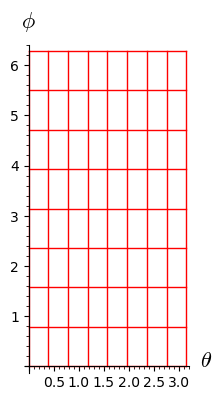

In [9]:
graph = X.plot()
graph

## Points on manifolds

Let us introduce a point $p\in S$, via the *parent/element* syntax of SageMath:

In [10]:
p = S((pi/2, pi/3), name='p')
print(p)

Point p on the 2-dimensional differentiable manifold S


In [11]:
p.parent()

2-dimensional differentiable manifold S

The coordinates of $p$ with respect to chart $X$ are recovered by letting the chart act on $p$:

In [12]:
X(p)

(1/2*pi, 1/3*pi)

Points can be plotted: let us add $p$ to the plot `graph` previously created

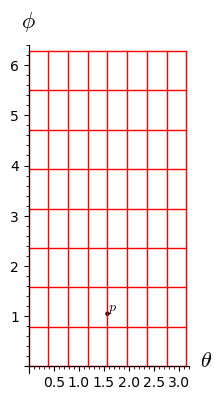

In [13]:
graph += p.plot()
graph

## Embedding of $S$ into the 3-dimensional Euclidean space

Euclidean spaces are predefined Riemannian manifolds in SageMath. To get the 3-dimensional Euclidean space $\mathbb{E}^3$, along with its canonical Cartesian coordinates $(x,y,z)$, we simply type:

In [14]:
E.<x,y,z> = EuclideanSpace()
E

Euclidean space E^3

The Python variables `x`, `y` and `z` are then injected in the global namespace to represent the coordinates $x$, $y$ and $z$ respectively.

The chart of coordinates $(x,y,z)$ is returned by the method `cartesian_coordinates()`:

In [15]:
E.cartesian_coordinates()

Chart (E^3, (x, y, z))

The embedding $S\to \mathbb{E}^3$ is defined by its coordinate expression:

In [16]:
F = S.diff_map(E, [sin(th)*cos(ph), sin(th)*sin(ph), cos(th)])
F.display()

S → E^3
   (th, ph) ↦ (x, y, z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

The image of the point $p$ by the embedding:

In [17]:
F(p)

Point on the Euclidean space E^3

In [18]:
E.cartesian_coordinates()(F(p))

(1/2, 1/2*sqrt(3), 0)

We may use $F$ to have a 3D view of the chart of spherical coordinates on $S$:

In [19]:
graph3 = X.plot(E.cartesian_coordinates(), mapping=F, 
                number_values=9)
graph3

Graphics3d Object

Adding the point $p$ to the plot:

In [20]:
graph3 += p.plot(E.cartesian_coordinates(), mapping=F)
graph3

Graphics3d Object

## Vector fields

The vector frame associated with the spherical coordinates is:

In [21]:
X.frame()

Coordinate frame (S, (∂/∂th,∂/∂ph))

Let us define a vector field on $S$ from its components in this vector frame (which is, at this stage, the default one on $S$):

In [22]:
v = S.vector_field(name='v')
v[:] = sin(th)/2, 1
v.display()

v = 1/2*sin(th) ∂/∂th + ∂/∂ph

In [23]:
v.display_comp()

v^th = 1/2*sin(th) 
v^ph = 1

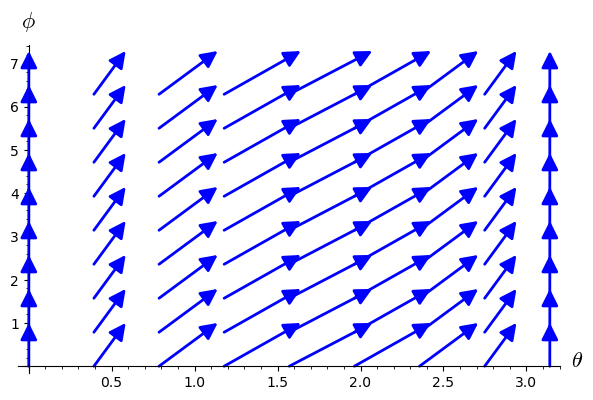

In [24]:
v.plot()

Thanks to the embedding $F: S\to \mathbb{E}^3$, we may add the plot of $v$ atop the 3D view of $S$:

In [25]:
graph3 += v.plot(E.cartesian_coordinates(), mapping=F, 
                 number_values=7)
graph3

Graphics3d Object

Value of the vector field $v$ at the point $p$:

In [26]:
vp = v.at(p)
print(vp)

Tangent vector v at Point p on the 2-dimensional differentiable manifold S


In [27]:
vp.parent()

Tangent space at Point p on the 2-dimensional differentiable manifold S

In [28]:
vp.display()

v = 1/2 ∂/∂th + ∂/∂ph

In [29]:
graph3 += vp.plot(E.cartesian_coordinates(), mapping=F, 
                  color='gold')
graph3

Graphics3d Object

## Metric tensor

The Euclidean space arrives with its default metric:

In [30]:
g = E.metric()
print(g)

Riemannian metric g on the Euclidean space E^3


In [31]:
g.display()

g = dx⊗dx + dy⊗dy + dz⊗dz

It is a *flat* metric, i.e. its Riemann curvature tensor vanished identically:

In [32]:
g.riemann().display()

Riem(g) = 0

Let us define the metric on $S$ as being the metric induced by the Euclidean metric $g$, i.e. the pullback of $g$ by the embedding $F$:

In [33]:
h = S.metric(name='h')
h.set(F.pullback(g))

The result of the pullback computation:

In [34]:
h.display()

h = dth⊗dth + sin(th)^2 dph⊗dph

The scalar square of the vector field $v$ with respect to the metric $h$:

In [35]:
print(h(v,v))

Scalar field h(v,v) on the 2-dimensional differentiable manifold S


In [36]:
h(v,v).display()

h(v,v): S → ℝ
   (th, ph) ↦ 5/4*sin(th)^2

In [37]:
h(v,v).expr()

5/4*sin(th)^2

The nonzero (and noredundant) Christoffel symbols of $h$ with respect to spherical coordinates:

In [38]:
h.christoffel_symbols_display()

Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_th,ph = cos(th)/sin(th)

Contrary to $g$, $h$ is not a flat metric:

In [39]:
h.riemann().display()

Riem(h) = sin(th)^2 ∂/∂th⊗dph⊗dth⊗dph - sin(th)^2 ∂/∂th⊗dph⊗dph⊗dth - ∂/∂ph⊗dth⊗dth⊗dph + ∂/∂ph⊗dth⊗dph⊗dth

In [40]:
h.riemann().display_comp()

Riem(h)^th_ph,th,ph = sin(th)^2 
Riem(h)^th_ph,ph,th = -sin(th)^2 
Riem(h)^ph_th,th,ph = -1 
Riem(h)^ph_th,ph,th = 1

The Ricci tensor of $h$:

In [41]:
h.ricci().display()

Ric(h) = dth⊗dth + sin(th)^2 dph⊗dph

$(S, h)$ is a manifold of constant positive curvature:

In [42]:
h.ricci_scalar().display()

r(h): S → ℝ
   (th, ph) ↦ 2

## Going further

See 
- these [manifold examples](https://sagemanifolds.obspm.fr/examples.html), in particular for multiple charts and their transition maps
- the [elementary vector calculus examples](https://sagemanifolds.obspm.fr/vector_calculus.html). 

If interested in extending the differential geometry part of SageMath, you are welcome to join the [SageManifolds project](https://sagemanifolds.obspm.fr/) developed by these [people](https://sagemanifolds.obspm.fr/authors.html).
